In [108]:
import pandas as pd
# Set the maximum number of rows to display
pd.set_option('display.max_rows', None)

In [109]:
#!pip install scikit-learn

In [110]:
# Load the downloaded data
nifty_data = pd.read_csv("nifty_10_years.csv")
nifty_data = nifty_data.iloc[2:]
nifty_data.columns = ['Date', 'Open', 'High', 'Low', 'Close', 'Volume']
nifty_data.set_index('Date', inplace=True)
nifty_data

Open              High               Low  \
Date                                                               
2013-01-02  5982.60009765625   6006.0498046875            5982.0   
2013-01-03   6015.7998046875            6017.0   5986.5498046875   
2013-01-04   6011.9501953125           6020.75   5981.5498046875   
2013-01-07  6042.14990234375  6042.14990234375  5977.14990234375   
2013-01-08   5983.4501953125   6007.0498046875  5964.39990234375   
2013-01-09   6006.2001953125  6020.10009765625   5958.4501953125   
2013-01-10   5998.7998046875  6005.14990234375   5947.2998046875   
2013-01-11  6012.39990234375  6018.85009765625  5940.60009765625   
2013-01-14   5967.2001953125  6036.89990234375  5962.14990234375   
2013-01-15  6037.85009765625            6068.5  6018.60009765625   
2013-01-16            6049.0   6055.9501953125   5992.0498046875   
2013-01-17           6001.25   6053.2001953125  5988.10009765625   
2013-01-18  6059.85009765625  6083.39990234375   6048.2998046875   
2013-01-21           6085.75  6094.35009765625  6065.10009765625   
2013-01-22  6080.14990234375   6101.2998046875            6040.5   
2013-01-23  6052.85009765625   6069.7998046875  6021.14990234375   
2013-01-24   6046.2001953125   6065.2998046875  6007.85009765625   
2013-01-25            6024.5   6080.5498046875   6014.4501953125   
2013-01-28  6082.10009765625  6088.39990234375  6061.39990234375   
2013-01-29   6064.7001953125   6111.7998046875   6042.4501953125   
2013-01-30            6065.0   6071.9501953125  6044.14990234375   
2013-01-31  6045.64990234375   6058.0498046875  6025.14990234375   
2013-02-01   6040.9501953125   6052.9501953125   5983.2001953125   
2013-02-04   6025.2001953125            6038.5           5981.25   
2013-02-05   5948.2001953125  5970.35009765625  5946.89990234375   
2013-02-06   5988.0498046875  5990.89990234375  5953.14990234375   
2013-02-07   5936.4501953125            5978.5  5927.60009765625   
2013-02-08  5929.10009765625   5953.7001953125  5883.64990234375   
2013-02-11   5920.0498046875  5924.14990234375  5879.10009765625   
2013-02-12  5894.35009765625  5927.64990234375   5886.4501953125   
2013-02-13  5943.14990234375            5969.5   5922.9501953125   
2013-02-14   5933.2001953125   5940.2001953125   5884.5498046875   
2013-02-15   5869.9501953125   5899.9501953125  5853.89990234375   
2013-02-18  5888.64990234375            5911.0   5878.4501953125   
2013-02-19   5900.2001953125   5947.5498046875  5883.14990234375   
2013-02-20   5966.2998046875            5971.0   5937.5498046875   
2013-02-21  5909.64990234375  5921.14990234375  5844.39990234375   
2013-02-22   5837.9501953125   5873.7998046875   5835.7998046875   
2013-02-25   5870.5498046875  5878.39990234375            5825.0   
2013-02-26   5838.2998046875  5838.85009765625  5748.60009765625   
2013-02-27  5784.89990234375   5818.2001953125   5749.7001953125   
2013-02-28  5834.35009765625  5849.89990234375  5671.89990234375   
2013-03-01   5702.4501953125   5739.4501953125  5679.89990234375   
2013-03-04   5704.7001953125            5712.0  5663.60009765625   
2013-03-05   5722.4501953125  5790.10009765625  5722.39990234375   
2013-03-06  5816.39990234375   5828.7001953125   5795.0498046875   
2013-03-07   5801.2998046875            5878.0   5801.2998046875   
2013-03-08  5883.64990234375  5952.85009765625            5883.0   
2013-03-11  5946.10009765625   5971.2001953125  5930.35009765625   
2013-03-12  5944.60009765625            5952.0  5893.64990234375   
2013-03-13   5884.7998046875  5893.85009765625           5842.25   
2013-03-14   5845.9501953125  5920.14990234375           5791.75   
2013-03-15  5914.89990234375  5945.64990234375            5861.0   
2013-03-18           5816.75   5850.2001953125  5814.35009765625   
2013-03-19            5859.5  5863.60009765625   5724.2998046875   
2013-03-20   5740.5498046875   5745.2998046875   5682.2998046875   
2013-03-21  5705.89990234375           5757.75   5647.9501953125   
2013-03-22  

In [111]:
# Check for null values
print("Checking for null values:\n")
print(nifty_data.isnull().sum())

Checking for null values:

Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64


In [112]:
# Ensure the index is a DatetimeIndex
nifty_data.index = pd.to_datetime(nifty_data.index)

# Check if dates are continuous (no missing trading days)
# Assuming no trading happens on weekends and public holidays
date_range = pd.date_range(start=nifty_data.index.min(), end=nifty_data.index.max(), freq='B')  # 'B' means business days
print(date_range)
print(nifty_data.index)
missing_dates = date_range.difference(nifty_data.index)

print("\nMissing Dates:")
print(missing_dates)

#this bock of code provides no value since nothing is done for the dates that were holidays

DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-12-18', '2023-12-19', '2023-12-20', '2023-12-21',
               '2023-12-22', '2023-12-25', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', length=2868, freq='B')
DatetimeIndex(['2013-01-02', '2013-01-03', '2013-01-04', '2013-01-07',
               '2013-01-08', '2013-01-09', '2013-01-10', '2013-01-11',
               '2013-01-14', '2013-01-15',
               ...
               '2023-12-15', '2023-12-18', '2023-12-19', '2023-12-20',
               '2023-12-21', '2023-12-22', '2023-12-26', '2023-12-27',
               '2023-12-28', '2023-12-29'],
              dtype='datetime64[ns]', name='Date', length=2700, freq=None)

Missing Dates:
DatetimeIndex(['2013-03-27', '2013-03-29', '2013-04-19', '2013-04-24

In [113]:
!pip install matplotlib --user
!where python

C:\Python312\python.exe
C:\Users\yadau\AppData\Local\Microsoft\WindowsApps\python.exe


In [114]:
print(nifty_data.dtypes)


Open      object
High      object
Low       object
Close     object
Volume    object
dtype: object


In [115]:
nifty_data['Close'] = pd.to_numeric(nifty_data['Close'], errors='coerce')
nifty_data['Open'] = pd.to_numeric(nifty_data['Open'], errors='coerce')
nifty_data['High'] = pd.to_numeric(nifty_data['High'], errors='coerce')
nifty_data['Low'] = pd.to_numeric(nifty_data['Low'], errors='coerce')
nifty_data['Volume'] = pd.to_numeric(nifty_data['Volume'], errors='coerce')
# errors='coerce' parameter will convert any non-numeric values (e.g., empty strings or invalid data) to NaN

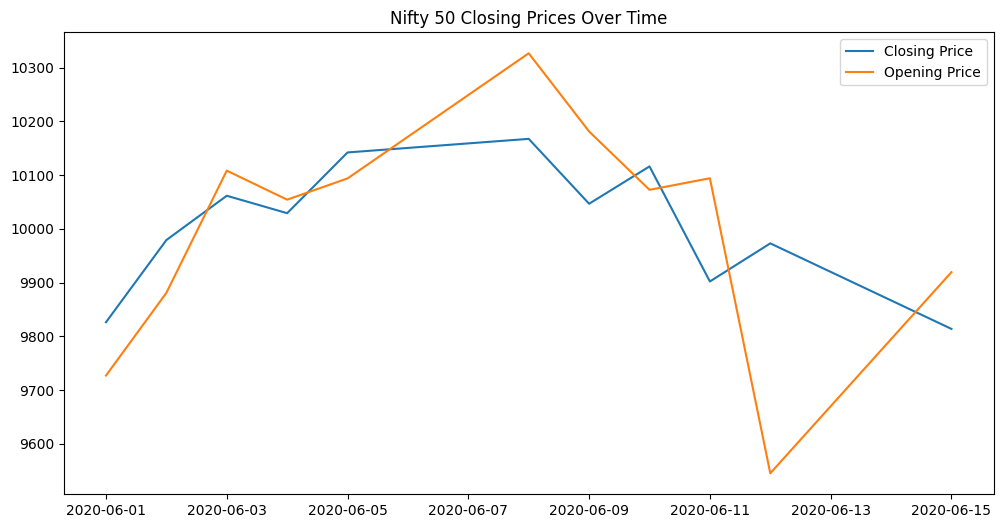

In [116]:
# Plotting to identify outliers
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12, 6))
plt.plot(nifty_data.loc['2020-06-01':'2020-06-15','Close'], label="Closing Price")
plt.plot(nifty_data.loc['2020-06-01':'2020-06-15','Open'], label="Opening Price")
plt.title("Nifty 50 Closing Prices Over Time")
plt.legend()
plt.show()

In [117]:
# Display data summary
print("\nData Summary:\n")
print(nifty_data.describe())


Data Summary:

               Open          High           Low         Close        Volume
count   2700.000000   2700.000000   2700.000000   2700.000000  2.700000e+03
mean   11364.825725  11418.140963  11292.118393  11356.717970  2.935654e+05
std     4159.661856   4173.421486   4139.054223   4158.403861  1.950139e+05
min     5233.450195   5317.700195   5118.850098   5285.000000  0.000000e+00
25%     8172.975098   8213.499756   8123.375122   8170.649902  1.669750e+05
50%    10488.925293  10537.100098  10431.799805  10479.250000  2.316500e+05
75%    14932.824951  14990.312744  14774.962891  14907.149902  3.460500e+05
max    21737.650391  21801.449219  21678.000000  21778.699219  1.811000e+06


In [118]:
# Create a new column for the previous day's closing price
nifty_data['Close_Prev_Day'] = nifty_data['Close'].shift(1)

# Create the gap feature (current day Open - previous day Close)
nifty_data['Gap'] = nifty_data['Open'] - nifty_data['Close_Prev_Day']

# Drop NaN values created due to the shift
nifty_data = nifty_data.dropna()


In [119]:
# Display the first few rows
nifty_data.head()

Open         High          Low        Close  Volume  \
Date                                                                     
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000       0   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902       0   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902       0   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195       0   
2013-01-09  6006.200195  6020.100098  5958.450195  5971.500000       0   

            Close_Prev_Day        Gap  
Date                                   
2013-01-03     5993.250000  22.549805  
2013-01-04     6009.500000   2.450195  
2013-01-07     6016.149902  26.000000  
2013-01-08     5988.399902  -4.949707  
2013-01-09     6001.700195   4.500000

In [120]:
nifty_data = nifty_data.assign(Day_Num=nifty_data.index.dayofweek)  # Monday=0, Sunday=6
nifty_data

Open          High           Low         Close   Volume  \
Date                                                                          
2013-01-03   6015.799805   6017.000000   5986.549805   6009.500000        0   
2013-01-04   6011.950195   6020.750000   5981.549805   6016.149902        0   
2013-01-07   6042.149902   6042.149902   5977.149902   5988.399902        0   
2013-01-08   5983.450195   6007.049805   5964.399902   6001.700195        0   
2013-01-09   6006.200195   6020.100098   5958.450195   5971.500000        0   
2013-01-10   5998.799805   6005.149902   5947.299805   5968.649902        0   
2013-01-11   6012.399902   6018.850098   5940.600098   5951.299805        0   
2013-01-14   5967.200195   6036.899902   5962.149902   6024.049805        0   
2013-01-15   6037.850098   6068.500000   6018.600098   6056.600098        0   
2013-01-16   6049.000000   6055.950195   5992.049805   6001.850098        0   
2013-01-17   6001.250000   6053.200195   5988.100098   6039.200195        0   
2013-01-18   6059.850098   6083.399902   6048.299805   6064.399902        0   
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   130900   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   129000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   137000   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   185200   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   147600   
2013-01-28   6082.100098   6088.399902   6061.399902   6074.799805   113100   
2013-01-29   6064.700195   6111.799805   6042.450195   6049.899902   157600   
2013-01-30   6065.000000   6071.950195   6044.149902   6055.750000   124200   
2013-01-31   6045.649902   6058.049805   6025.149902   6034.750000   168500   
2013-02-01   6040.950195   6052.950195   5983.200195   5998.899902   159300   
2013-02-04   6025.200195   6038.500000   5981.250000   5987.250000   141700   
2013-02-05   5948.200195   5970.350098   5946.899902   5956.899902   136200   
2013-02-06   5988.049805   5990.899902   5953.149902   5959.200195   157800   
2013-02-07   5936.450195   5978.500000   5927.600098   5938.799805   157600   
2013-02-08   5929.100098   5953.700195   5883.649902   5903.500000   192600   
2013-02-11   5920.049805   5924.149902   5879.100098   5897.850098   122000   
2013-02-12   5894.350098   5927.649902   5886.450195   5922.500000   142800   
2013-02-13   5943.149902   5969.500000   5922.950195   5932.950195   142600   
2013-02-14   5933.200195   5940.200195   5884.549805   5896.950195   143800   
2013-02-15   5869.950195   5899.950195   5853.899902   5887.399902   125100   
2013-02-18   5888.649902   5911.000000   5878.450195   5898.200195   114300   
2013-02-19   5900.200195   5947.549805   5883.149902   5939.700195   101000   
2013-02-20   5966.299805   5971.000000   5937.549805   5943.049805   135400   
2013-02-21   5909.649902   5921.149902   5844.399902   5852.250000   159400   
2013-02-22   5837.950195   5873.799805   5835.799805   5850.299805   157000   
2013-02-25   5870.549805   5878.399902   5825.000000   5854.750000   125100   
2013-02-26   5838.299805   5838.850098   5748.600098   5761.350098   157400   
2013-02-27   5784.899902   5818.200195   5749.700195   5796.899902   175200   
2013-02-28   5834.350098   5849.899902   5671.899902   5693.049805   334900   
2013-03-01   5702.450195   5739.450195   5679.899902   5719.700195   174500   
2013-03-04   5704.700195   5712.000000   5663.600098   5698.500000   144900   
2013-03-05   5722.450195   5790.100098   5722.399902   5784.250000   154400   
2013-03-06   5816.399902   5828.700195   5795.049805   5818.600098   156900   
2013-03-07   5801.299805   5878.000000   5801.299805   5863.299805   134700   
2013-03-08   5883.649902   5952.850098   5883.000000   5945.700195   150800   
2013-03-11   5946.100098   5971.200195   5930.350098   5942.350098   125400   
2013-03-12   5944.600098   5952.000000   5893.649902   5914.100098   1

In [121]:
nifty_data = nifty_data.assign(SMA_5 = nifty_data['Close'].rolling(window=5).mean())
nifty_data = nifty_data.assign(SMA_10 = nifty_data['Close'].rolling(window=10).mean())

nifty_data.head(11)

Open         High          Low        Close  Volume  \
Date                                                                     
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000       0   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902       0   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902       0   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195       0   
2013-01-09  6006.200195  6020.100098  5958.450195  5971.500000       0   
2013-01-10  5998.799805  6005.149902  5947.299805  5968.649902       0   
2013-01-11  6012.399902  6018.850098  5940.600098  5951.299805       0   
2013-01-14  5967.200195  6036.899902  5962.149902  6024.049805       0   
2013-01-15  6037.850098  6068.500000  6018.600098  6056.600098       0   
2013-01-16  6049.000000  6055.950195  5992.049805  6001.850098       0   
2013-01-17  6001.250000  6053.200195  5988.100098  6039.200195       0   

            Close_Prev_Day        Gap  Day_Num        SMA_5       SMA_10  
Date                                                                      
2013-01-03     5993.250000  22.549805        3          NaN          NaN  
2013-01-04     6009.500000   2.450195        4          NaN          NaN  
2013-01-07     6016.149902  26.000000        0          NaN          NaN  
2013-01-08     5988.399902  -4.949707        1          NaN          NaN  
2013-01-09     6001.700195   4.500000        2  5997.450000          NaN  
2013-01-10     5971.500000  27.299805        3  5989.279980          NaN  
2013-01-11     5968.649902  43.750000        4  5976.309961          NaN  
2013-01-14     5951.299805  15.900391        0  5983.439941          NaN  
2013-01-15     6024.049805  13.800293        1  5994.419922          NaN  
2013-01-16     6056.600098  -7.600098        2  6000.489941  5998.969971  
2013-01-17     6001.850098  -0.600098        3  6014.600000  6001.939990

In [122]:
# Remove rows with at least one NaN value
nifty_data = nifty_data.dropna()
nifty_data

Open          High           Low         Close   Volume  \
Date                                                                          
2013-01-16   6049.000000   6055.950195   5992.049805   6001.850098        0   
2013-01-17   6001.250000   6053.200195   5988.100098   6039.200195        0   
2013-01-18   6059.850098   6083.399902   6048.299805   6064.399902        0   
2013-01-21   6085.750000   6094.350098   6065.100098   6082.299805   130900   
2013-01-22   6080.149902   6101.299805   6040.500000   6048.500000   129000   
2013-01-23   6052.850098   6069.799805   6021.149902   6054.299805   137000   
2013-01-24   6046.200195   6065.299805   6007.850098   6019.350098   185200   
2013-01-25   6024.500000   6080.549805   6014.450195   6074.649902   147600   
2013-01-28   6082.100098   6088.399902   6061.399902   6074.799805   113100   
2013-01-29   6064.700195   6111.799805   6042.450195   6049.899902   157600   
2013-01-30   6065.000000   6071.950195   6044.149902   6055.750000   124200   
2013-01-31   6045.649902   6058.049805   6025.149902   6034.750000   168500   
2013-02-01   6040.950195   6052.950195   5983.200195   5998.899902   159300   
2013-02-04   6025.200195   6038.500000   5981.250000   5987.250000   141700   
2013-02-05   5948.200195   5970.350098   5946.899902   5956.899902   136200   
2013-02-06   5988.049805   5990.899902   5953.149902   5959.200195   157800   
2013-02-07   5936.450195   5978.500000   5927.600098   5938.799805   157600   
2013-02-08   5929.100098   5953.700195   5883.649902   5903.500000   192600   
2013-02-11   5920.049805   5924.149902   5879.100098   5897.850098   122000   
2013-02-12   5894.350098   5927.649902   5886.450195   5922.500000   142800   
2013-02-13   5943.149902   5969.500000   5922.950195   5932.950195   142600   
2013-02-14   5933.200195   5940.200195   5884.549805   5896.950195   143800   
2013-02-15   5869.950195   5899.950195   5853.899902   5887.399902   125100   
2013-02-18   5888.649902   5911.000000   5878.450195   5898.200195   114300   
2013-02-19   5900.200195   5947.549805   5883.149902   5939.700195   101000   
2013-02-20   5966.299805   5971.000000   5937.549805   5943.049805   135400   
2013-02-21   5909.649902   5921.149902   5844.399902   5852.250000   159400   
2013-02-22   5837.950195   5873.799805   5835.799805   5850.299805   157000   
2013-02-25   5870.549805   5878.399902   5825.000000   5854.750000   125100   
2013-02-26   5838.299805   5838.850098   5748.600098   5761.350098   157400   
2013-02-27   5784.899902   5818.200195   5749.700195   5796.899902   175200   
2013-02-28   5834.350098   5849.899902   5671.899902   5693.049805   334900   
2013-03-01   5702.450195   5739.450195   5679.899902   5719.700195   174500   
2013-03-04   5704.700195   5712.000000   5663.600098   5698.500000   144900   
2013-03-05   5722.450195   5790.100098   5722.399902   5784.250000   154400   
2013-03-06   5816.399902   5828.700195   5795.049805   5818.600098   156900   
2013-03-07   5801.299805   5878.000000   5801.299805   5863.299805   134700   
2013-03-08   5883.649902   5952.850098   5883.000000   5945.700195   150800   
2013-03-11   5946.100098   5971.200195   5930.350098   5942.350098   125400   
2013-03-12   5944.600098   5952.000000   5893.649902   5914.100098   115900   
2013-03-13   5884.799805   5893.850098   5842.250000   5851.200195   116700   
2013-03-14   5845.950195   5920.149902   5791.750000   5908.950195   149000   
2013-03-15   5914.899902   5945.649902   5861.000000   5872.600098   152200   
2013-03-18   5816.750000   5850.200195   5814.350098   5835.250000   102700   
2013-03-19   5859.500000   5863.600098   5724.299805   5745.950195   182300   
2013-03-20   5740.549805   5745.299805   5682.299805   5694.399902   187600   
2013-03-21   5705.899902   5757.750000   5647.950195   5658.750000   179200   
2013-03-22   5659.799805   5691.450195   5631.799805   5651.350098   165300   
2013-03-25   5707.299805   5718.399902   5624.399902   5633.850098   1

In [123]:
# Create the target column
# 1 indicates the stock goes up (closing price increases).
# 0 indicates the stock goes down (closing price decreases).
nifty_data['UpDown'] = (nifty_data['Close'].shift(-1) > nifty_data['Close']).astype(int)
# Drop NaN values created due to the shift
nifty_data = nifty_data.dropna()

In [124]:
nifty_data.to_csv('feature_extraction_nifty_data.csv')